<a href="https://colab.research.google.com/github/Sreelakshmiamenon/Machine-learning-projects/blob/main/28_KMeans_Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.drop(['CustomerID','Genre'],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Since here the data is small, there is no need for separating x and y for training and testing datas.

In [ ]:
x=df.iloc[:,::]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
#Calculate the elbow point
from sklearn.cluster import KMeans
wcss=[]     #to append variance
for i in range(1,11):   #i act as no of clusters
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

In [ ]:
print(wcss)

[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556197, 75378.76464074483, 58302.40630860368, 51118.949931647294, 44312.46881207722, 40894.98978213978, 37468.51571576572]


Text(0.5, 1.0, 'Elbow point evaluation')

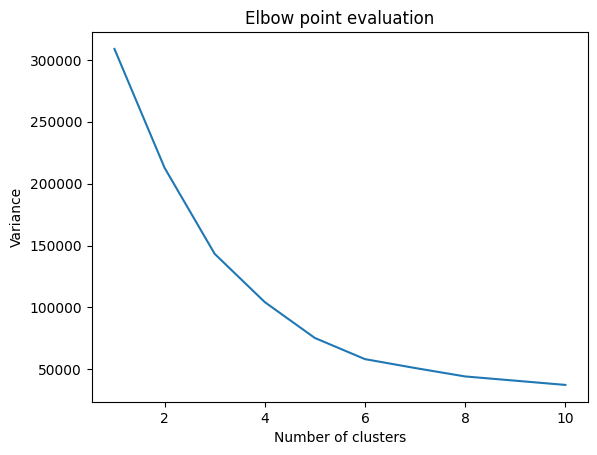

In [ ]:
plt.plot(range(1,11),wcss)
#here x is 1-10 and y is wcss
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow point evaluation')

Here, 6 is the number of clusters because in the graph, from 6 the value remains constant.

In [ ]:
model=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [ ]:
x['cluster']=y_means    #add a new column which is clusters
x

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_means,test_size=0.30,random_state=42)
x_train

,Age,Annual Income (k$),Spending Score (1-100),cluster
169,32,87,63,1
97,27,60,50,4
31,21,30,73,3
12,58,20,15,0
35,21,33,81,3
...,...,...,...,...
106,66,63,50,2
14,37,20,13,0
92,48,60,49,2
179,35,93,90,1


In [ ]:
x_test

,Age,Annual Income (k$),Spending Score (1-100),cluster
95,24,60,52,4
15,22,20,79,3
30,60,30,4,0
158,34,78,1,5
128,59,71,11,5
115,19,65,50,4
69,32,48,47,4
170,40,87,13,5
174,52,88,13,5
45,24,39,65,3


In [ ]:
y_train

array([1, 4, 3, 0, 3, 2, 0, 1, 2, 5, 4, 1, 5, 3, 2, 4, 0, 1, 4, 4, 0, 4,
       2, 1, 1, 2, 1, 0, 5, 4, 0, 1, 2, 3, 3, 5, 1, 0, 3, 4, 0, 0, 4, 1,
       2, 5, 0, 2, 4, 5, 5, 0, 5, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 5, 3, 3,
       5, 1, 4, 3, 5, 4, 4, 5, 4, 5, 3, 4, 2, 1, 5, 5, 1, 4, 2, 0, 3, 2,
       4, 2, 5, 1, 2, 0, 3, 2, 1, 1, 3, 2, 1, 5, 1, 1, 2, 2, 2, 2, 5, 4,
       4, 4, 3, 2, 5, 5, 1, 3, 1, 1, 3, 4, 1, 5, 1, 4, 4, 2, 4, 2, 4, 1,
       0, 5, 2, 2, 0, 2, 1, 2], dtype=int32)

In [ ]:
y_test

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.47625237,  0.98322099,  0.4438231 , -0.90301733],
       [-0.83128609, -0.01051573, -0.05203819,  0.92038304],
       [-1.25732655, -1.11466765,  0.82525485,  0.31258292],
       [ 1.36992295, -1.48271829, -1.38704935, -1.51081745],
       [-1.25732655, -1.00425246,  1.13040026,  0.31258292],
       [ 0.80186901,  0.24711972,  0.21496404, -0.2952172 ],
       [ 0.65985552, -0.78342208, -0.58604265, -1.51081745],
       [-0.1922254 ,  1.57210202,  1.28297297, -0.90301733],
       [ 2.07999038, -0.0473208 ,  0.13867769, -0.2952172 ],
       [ 0.37582855,  0.4679501 , -1.69219475,  1.52818317],
       [-0.40524563, -0.67300688,  0.32939357,  0.92038304],
       [ 0.09180158,  0.39433997,  1.66440472, -0.90301733],
       [-1.39934003,  0.76239061, -1.7684811 ,  1.52818317],
       [-1.04430632, -0.82022714,  1.5499752 ,  0.31258292],
       [ 0.87287575,  0.24711972, -0.31904042, -0.2952172 ],
       [-1.39934003,  0.13670452, -0.20461089,  0.92038304],
       [ 0.44683529, -1.

In [ ]:
x_test

array([[-1.04430632, -0.01051573,  0.02424816,  0.92038304],
       [-1.1863198 , -1.48271829,  1.05411391,  0.31258292],
       [ 1.51193644, -1.11466765, -1.80662428, -1.51081745],
       [-0.33423888,  0.65197542, -1.92105381,  1.52818317],
       [ 1.4409297 ,  0.39433997, -1.53962205,  1.52818317],
       [-1.39934003,  0.17350959, -0.05203819,  0.92038304],
       [-0.47625237, -0.4521765 , -0.16646772,  0.92038304],
       [ 0.09180158,  0.98322099, -1.4633357 ,  1.52818317],
       [ 0.94388249,  1.02002606, -1.4633357 ,  1.52818317],
       [-1.04430632, -0.78342208,  0.52010945,  0.31258292],
       [ 0.3048218 , -0.4521765 , -0.05203819, -0.2952172 ],
       [ 0.51784203,  1.3880767 , -1.38704935,  1.52818317],
       [-0.1922254 ,  0.90961087,  0.90154121, -0.90301733],
       [-1.11531306, -0.23134612,  0.02424816,  0.92038304],
       [ 1.08589598,  1.49849189, -1.04376076,  1.52818317],
       [-0.83128609,  1.02002606,  0.67268215, -0.90301733],
       [ 0.87287575, -0.

In [ ]:
from sklearn.naive_bayes import GaussianNB  #Using naive bayes
data=GaussianNB()
data.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=data.predict(x_test)
y_pred

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [ ]:
y_test

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
mat=confusion_matrix(y_test,y_pred)
mat

array([[ 5,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 13]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

